### Lý thuyết

####  1) Tạo ma trận từ một danh sách

In [2]:
import numpy as np

# Tạo một ma trận với kích thước 2x3
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
matrix

array([[1, 2, 3],
       [4, 5, 6]])

#### 2)  Phép cộng ma trận

In [3]:
import numpy as np

# Tạo hai ma trận A và B
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

# Thực hiện cộng ma trận
C = A + B
print("A + B:\n", C)

A + B:
 [[ 6  8]
 [10 12]]


#### 3) Hàm np.stack()


In [4]:
import numpy as np

# Tạo 2 array 1D
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

# Stack các array theo một trục
stacked_arr = np.stack((arr1, arr2), axis=0)
print("Array sau khi stack :\n", stacked_arr)

Array sau khi stack :
 [[1 2 3]
 [4 5 6]]


In [5]:
stacked_arr = np.stack((arr1, arr2), axis=1)
print("Array sau khi stack :\n", stacked_arr)

Array sau khi stack :
 [[1 4]
 [2 5]
 [3 6]]


#### 4) Hàm np.sum()

In [6]:
import numpy as np

# Tạo một array 2D
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Tính tổng theo từng dòng ( axis =1)
row_sum = np.sum(arr, axis=1)
print("Tổng theo dòng:", row_sum)

# Tính tổng theo từng cột ( axis =0)
column_sum = np.sum(arr, axis=0)
print("Tổng theo cột:", column_sum)

Tổng theo dòng: [ 6 15 24]
Tổng theo cột: [12 15 18]


#### 5) Hàm np.where()


In [7]:
import numpy as np

# Tạo một array 2D
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Sử dụng hàm where để tạo ra array mới có giá trị các phần tử lớn hơn 5 được thay thế bằng 0, các phần tử còn lại thì giữ nguyên.
new_arr = np.where(arr > 5, 0, arr)

# In ra array mới
print(new_arr)


[[1 2 3]
 [4 5 0]
 [0 0 0]]


### Experiments

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
def computeDifference(bg_img, input_img):
    # Tính toán giá trị khác biệt tuyệt đối giữa hai hình ảnh
    difference_three_channel = np.abs(bg_img - input_img)

    # Chuyển đổi sự khác biệt 3 kênh sang một kênh bằng cách tính trung bình.
    # Điều này giúp giảm dữ liệu khác biệt xuống một giá trị cường độ đơn lẻ.
    difference_single_channel = np.sum(difference_three_channel, axis=2)/ 3.0

    # Chuyển đổi trở lại sang uint8 để phù hợp với xử lý ảnh.
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

In [24]:
def computeBinaryMask(difference_single_channel, threshold = 10):
    # Áp dụng ngưỡng (threshold) để tạo mask nhị phân
    # Các điểm ảnh có sự chênh lệch màu sắc lớn hơn hoặc bằng 15 được đặt là 255(trắng), còn lại là 0 (đen).
    difference_binary = np.where(difference_single_channel >= threshold, 255, 0)

    # Ghép nối mask nhị phân thành 3 kênh để phù hợp với định dạng RGB.
    binary_binary = np.stack((difference_binary,) * 3, axis=-1)

    return binary_binary

In [25]:
def replaceBackGround(bg_image1, bg_image2, ob_image):
    # Tính toán sự khác biệt giữa hình ảnh đối tượng và hình nền thứ nhất
    difference_single_channel = computeDifference(bg_image1, ob_image)

    # Tính toán mask nhị phân dựa trên sự khác biêt
    binary_mask = computeBinaryMask(difference_single_channel)

    # Thay thế hình nền:
    # ở vị trí mà mask là trắng (255): thay thế bằng hình nền thứ hai.
    # ở vị trí mà mask là đen (0): giữ hình ảnh đối tượng.
    output = np.where(binary_mask == 255, ob_image, bg_image2)

    return output

In [14]:
bg_image1 = cv2.imread('experiments/background1.png')
bg_image2 = cv2.imread('experiments/background2.png')
ob_image = cv2.imread('experiments/object.png')

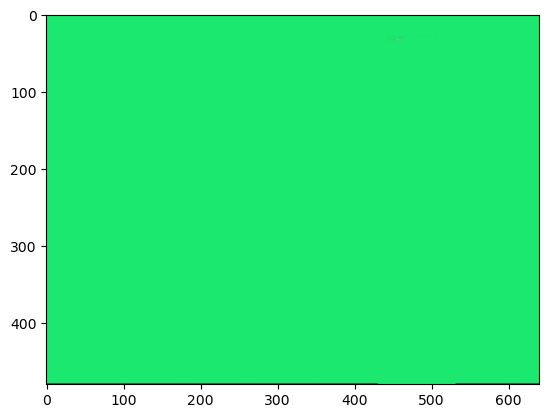

In [18]:
# Resize kích thuớc ảnh đầu vào
bg_image1 = cv2.resize(bg_image1, (640, 480))
bg_image2 = cv2.resize(bg_image2, (640, 480))
ob_image = cv2.resize(ob_image, (640, 480))

plt.imshow(bg_image1)

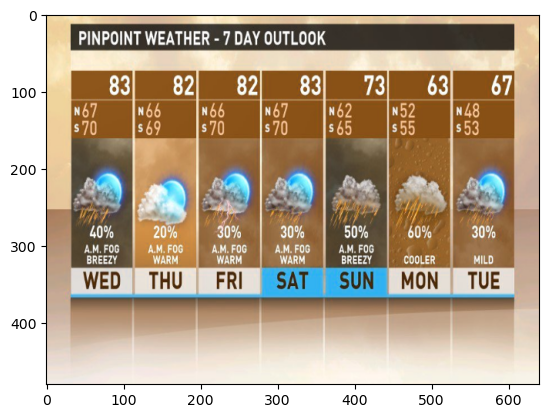

In [20]:
plt.imshow(bg_image2)

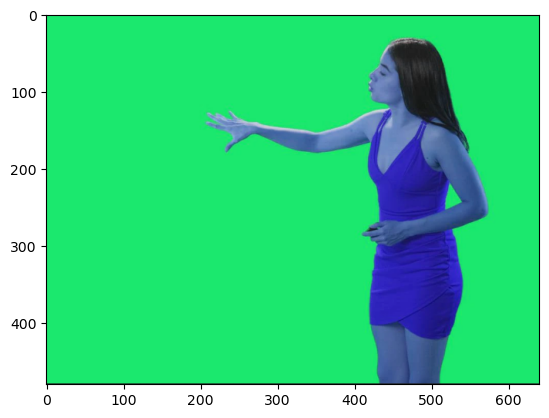

In [21]:
plt.imshow(ob_image)

In [22]:
# Chuyển đổi ảnh màu từ hệ BRG sang hệ RGB
bg_image1 = cv2.cvtColor(bg_image1, cv2.COLOR_BGR2RGB)
bg_image2 = cv2.cvtColor(bg_image2, cv2.COLOR_BGR2RGB)
ob_image = cv2.cvtColor(ob_image, cv2.COLOR_BGR2RGB)

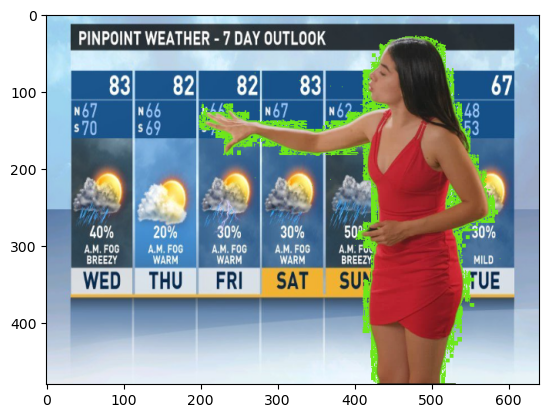

In [26]:
# Tiến hành background subtraction
output_image = replaceBackGround(bg_image1, bg_image2, ob_image)

# Hiển thị kết quả
plt.imshow(output_image)

### Bài tập

#### Bài 1

In [27]:
import numpy as np

# Tạo hai array 1D
arr1 = np.array([2, 3, 4])
arr2 = np.array([5, 5, 7])

# Stack các array
stacked_arr = np.stack((arr1, arr2), axis=1)

print("Array đã stack :\n", stacked_arr)

Array đã stack :
 [[2 5]
 [3 5]
 [4 7]]


In [28]:
## Đáp án: B

#### Bài 2

In [29]:
import numpy as np

# Tạo 2 ma trận
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])

# In ra kết quả
print(matrix1 + matrix2)

[[ 6  8]
 [10 12]]


In [30]:
## Đáp án: B

#### Bài 3

In [31]:
import numpy as np

# Tạo 2 ma trận
matrix1 = [[1, 2], [3, 4]]
matrix2 = [[5, 6], [7, 8]]

# In ra kết quả
print(matrix1 + matrix2)

[[1, 2], [3, 4], [5, 6], [7, 8]]


In [32]:
## Đáp án: C

#### Bài 4

In [33]:
#  Hàm np.where trong NumPy có chức năng gì?
# A. Tìm kiếm các phần tử trong mảng phù hợp với điều kiện đã định và trả về chỉ số của chúng

#### Bài 5

In [34]:
import numpy as np

array = np.array([1, 2, 3, 4, 5, 6])
result = np.where(array > 3, "A", "B")

print(result)

['B' 'B' 'B' 'A' 'A' 'A']


In [35]:
## Đáp án: B

#### Bài 6

In [40]:
import cv2
import numpy as np

# Load các ảnh input
bg_image1 = cv2.imread('experiments/background1.png', 0)
ob_image = cv2.imread('experiments/object.png', 0)

# Resize kích thước ảnh đầu vào về cùng kích thước
bg_image1 = cv2.resize(bg_image1, (640, 480))
ob_image = cv2.resize(ob_image, (640, 480))

# Chuyển đổi cân màu từ BRG sang RGB
bg_image1 = cv2.cvtColor(bg_image1, cv2.COLOR_BGR2RGB)
ob_image = cv2.cvtColor(ob_image, cv2.COLOR_BGR2RGB)

difference_three_channel = np.abs(bg_image1 - ob_image)
# difference_three_channel = np.sum(difference_three_channel, axis=2)/ 3.0
# difference_three_channel = difference_three_channel.astype('uint8')
difference_three_channel

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [41]:
## Đáp án: A

#### Bài 7

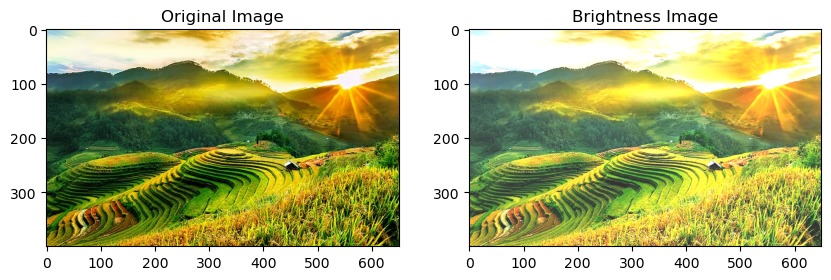

In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đọc hình ảnh
img = cv2.imread("data/nature.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Điều chỉnh độ sáng hình ảnh
img_copy = img.astype(float).copy()
new_img = img_copy + 50
new_img = np.clip(new_img, 0, 255)
new_img = new_img.astype(np.uint8)

# Hiển thị hình ảnh
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(new_img)
plt.title("Brightness Image")
plt.show()

In [60]:
## Đáp án: C

#### Bài 8

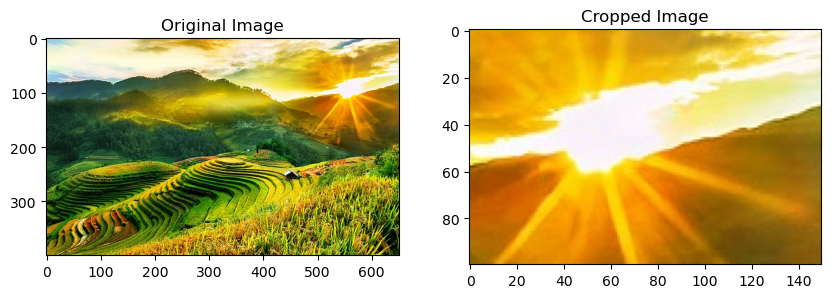

In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đọc hình ảnh
img = cv2.imread("data/nature.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Crop hình ảnh
crop_img = img[50:150, 500:700]

# Hiển thị hình ảnh
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(crop_img)
plt.title("Cropped Image")
plt.show()

In [65]:
## Đáp án: B